**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

## 1.1 Load the Heart Disease UCI dataset

In [141]:
!pip install ucimlrepo

In [142]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import pandas as pd

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

## 1.2 Explore the dataset to understand its structure and features.

In [143]:
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [144]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


## 1.3 Split the data into training and testing sets.

In [145]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

## 2.1 Handle missing values

In [146]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [147]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [148]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [149]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
numerical_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [150]:
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])

In [151]:
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

In [152]:
X_train.isnull().sum()
X_test.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

## 2.2 Encode categorical variables using appropriate methods, 2.3 Standardize or normalize numerical features if necessary.

In [153]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [154]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor= ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(sparse_output=False),categorical_features)
    ]
)

preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak', 'ca']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'thal'])])

In [155]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

In [156]:
X_test_preprocessed = preprocessor.transform(X_test)

# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

## 3.1 Build an initial XGBoost model using default hyperparameters.

In [157]:
!pip install xgboost

In [158]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(random_state=42)

## 3.2 Train the model on the training set and evaluate its performance on the testing set.

In [159]:
xgb_model.fit(X_train_preprocessed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## 3.3 Note down the accuracy and any other relevant metrics.

In [160]:
y_pred = xgb_model.predict(X_test_preprocessed)

In [161]:
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1}")

# Other metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.45901639344262296
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.00      0.00      0.00        12
           2       0.09      0.11      0.10         9
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.20      0.23      0.21        61
weighted avg       0.38      0.46      0.42        61

[[26  2  1  0  0]
 [ 6  0  4  1  1]
 [ 3  1  1  4  0]
 [ 0  2  4  1  0]
 [ 0  2  1  1  0]]


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [162]:
from sklearn.model_selection import GridSearchCV

# hyperparameter space
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [250, 300, 350],
    'max_depth': [3, 6, 9],
}

# configure GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# do the search
grid_search.fit(X_train_preprocessed, y_train)

best_params = grid_search.best_params_
print(f"best hyperparameters: {best_params}")

# train and evaluate model with best hyperparameters
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test_preprocessed)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"new accuracy: {accuracy2}")


best hyperparameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 250}
new accuracy: 0.47540983606557374


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

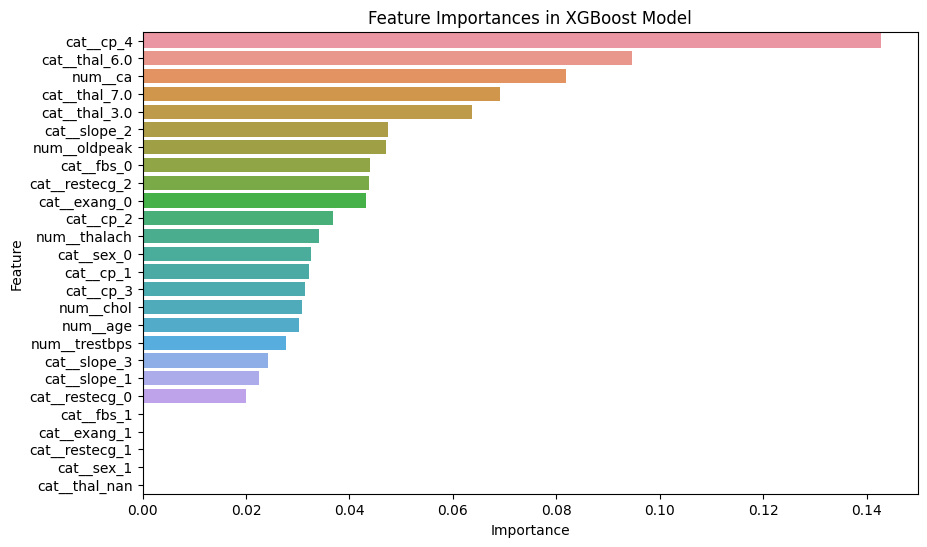

In [163]:
import matplotlib.pyplot as plt

feature_importances = xgb_model.feature_importances_

feature_names = X_train_preprocessed.columns

importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importances = importances.sort_values(by='Importance', ascending=False)

# more important characteristics
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances in XGBoost Model')
plt.show()



# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

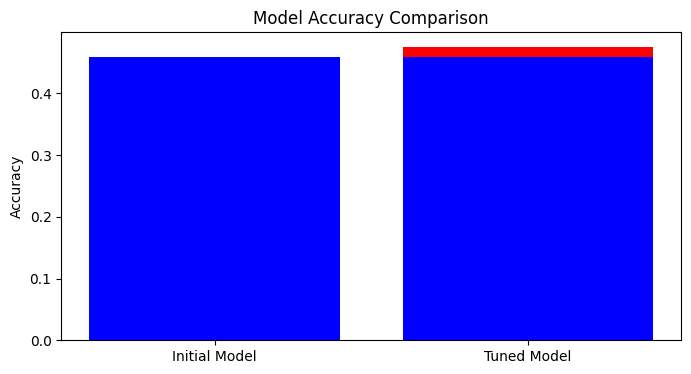

In [166]:
# Metrics to compare
metrics = ['Initial Model', 'Tuned Model']
scores = [accuracy1, accuracy2]


# calculate the improvements for both models, to show in the bar
improvements = [0, accuracy2 - accuracy1]  # no improve for initial model

plt.figure(figsize=(8, 4))

plt.bar(metrics, scores, color='blue')

# bar to show the improvement
plt.bar(metrics, improvements, color='red', bottom=accuracy1)

plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.show()